# Jumpstart for your KickStart

## Introduction
Kickstater is a Benefit Corporation whose mission is to 'help bring creative projects to life(Kickstart).' Below is the pledge data for all the kickstarter projects in 2018. The data will be analyzed to understand the current trends within the success rates of projects. The goal is to implement tools to help creators successful fund projects.

### Import the data and cleaning process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import the CSV file
ks = pd.read_csv('ks-projects-2018.csv')

# Output how many items are NaN and the length of the dataframe
print(ks.isna().sum())
print('Number of rows = ' +str(len(ks.index)))

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64
Number of rows = 378661


In [3]:
# Noted above there are 3797 items missing out of 378K so they will be deleted
ks.dropna(subset=['name', 'usd pledged'], inplace=True)
ks.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
# Check that each column is correct datatype 
ks.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

### Understanding the data.
In this section a couple of questions will be asked to gain an understanding of the population.
    1. What is the central tendency of the data?
    2. What are the popular categories?
    3. What is the fail rate by cost?
    4. What is the fail rate by category?

The central tendency is outlined below. what is interesting is that the max pledge goal is 166M while the minimum is only a penny. The mean is pretty high at 45K, which is skewed by the max pledge. The best indicator of the center is the median which is 5.5K.

In [25]:
# Central Tendency
ks['usd_goal_real'].describe().apply(lambda x: format(x, 'f'))

count       374860.000000
mean         45863.025972
std        1158767.372735
min              0.010000
25%           2000.000000
50%           5500.000000
75%          16000.000000
max      166361390.710000
Name: usd_goal_real, dtype: object

In [7]:
# Create groups based on price points
ks['goal_group'] = pd.cut(x=ks['usd_goal_real'],
                   bins=[0, 1000, 2500, 5000, 10000, 25000, 50000, 100000, 200000000],
                   include_lowest=True,
                   labels=['0-1,000', '1,000-2,500', '2,500-5,000','5,000-10,000',
                          '10,000-25,000', '25,000-50,000', '50,000-100,000',
                          '100,000+'])
ks.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_group
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,"1,000-2,500"
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,"25,000-50,000"
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,"25,000-50,000"
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,"2,500-5,000"
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,"10,000-25,000"


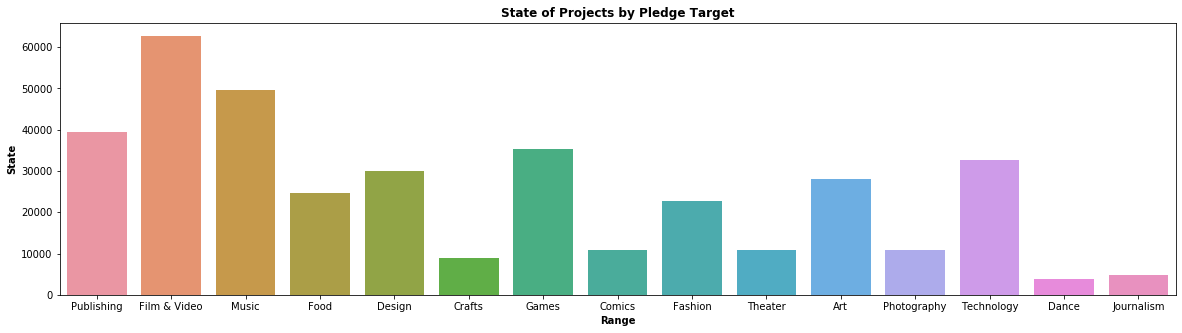

In [11]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='main_category', data=ks)

plt.title('State of Projects by Pledge Target', fontweight='bold')
plt.xlabel('Range', fontweight='bold')
plt.ylabel('State', fontweight='bold')

plt.show()

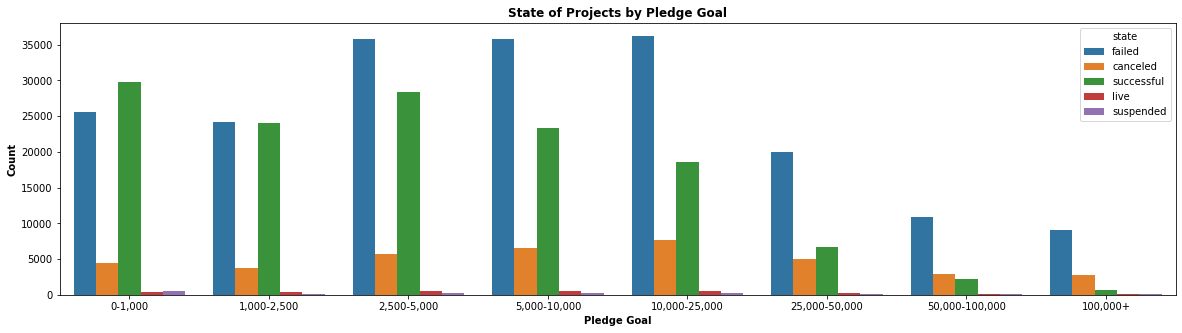

In [8]:
# Generate scatter plot with trendlines for 5 years
plt.figure(figsize=(20,5))
count_plot = sns.countplot(data=ks, x='goal_group', hue='state')

plt.title('State of Projects by Pledge Goal', fontweight='bold')
plt.xlabel('Pledge Goal', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show()

The average pledge goal that fails in 63K where as the average successful pledge goal is 9.5K. Thats a huge difference, which indicates that the larger projects typically fail to get funding. 

In [21]:
# Create a groupby project state to see average success and failure amounts
state_group = ks.groupby(['state'], as_index=False).mean()
del state_group['ID']
state_group.head(5)

,state,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
0,canceled,86233.109687,2646.515938,26.002142,1875.463782,2341.025367,75613.449092
1,failed,67363.127949,1427.445891,16.431236,1133.755014,1321.102821,63189.222623
2,live,76780.893138,9088.487545,68.124017,1254.124725,5871.264482,62548.695954
3,successful,10166.109761,24094.387965,264.128397,17356.034449,22664.485818,9535.701785
4,suspended,181648.937059,10824.334031,105.253391,7842.795621,9317.727146,175476.682919


In [40]:
group_state = ks.groupby(['goal_group', 'state'], as_index=False)['usd_goal_real'].count()
group_state.head(5)

,goal_group,state,usd_goal_real
0,"0-1,000",canceled,4455
1,"0-1,000",failed,25634
2,"0-1,000",live,439
3,"0-1,000",successful,29847
4,"0-1,000",suspended,513


In [43]:
group = ks.groupby(['goal_group'], as_index=False)['usd_goal_real'].count()
group

,goal_group,usd_goal_real
0,"0-1,000",60888
1,"1,000-2,500",52504
2,"2,500-5,000",70562
3,"5,000-10,000",66520
4,"10,000-25,000",63158
5,"25,000-50,000",32196
6,"50,000-100,000",16353
7,"100,000+",12679


# Question 
How to get the percentage of pledges that are successful or failed based on goal group? I created the two dataframes above. What would be the best way to formulate this?

### State of Projects by Category
Are there more categories that fail more often than others? The chart below shows that the top 3 most failed categories are: Technology, Fashion, and Food. A follow up question to this chart is to see what the average pledge goal to see if there is a trend in failures. 

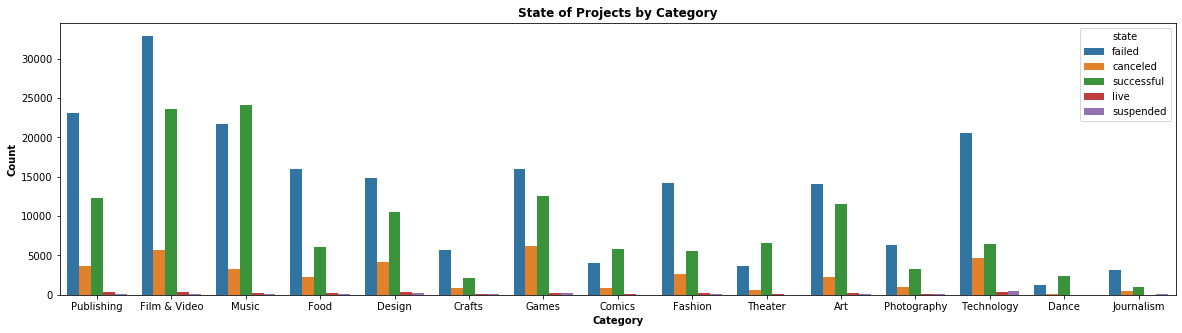

In [9]:
# Generate scatter plot with trendlines for 5 years
plt.figure(figsize=(20,5))
count_plot = sns.countplot(data=ks, x='main_category', hue='state')



plt.title('State of Projects by Category', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.show()

# Question
How do I get the catplot below to have the x-axis labels on each row? Makes the chart hard to read without it.

The chart below shows the breakout of each category and the pledge amount for each failed and successful project. This shows that the large majority of expensive project fails. It is the primary reason why the majority of the technology projects. 

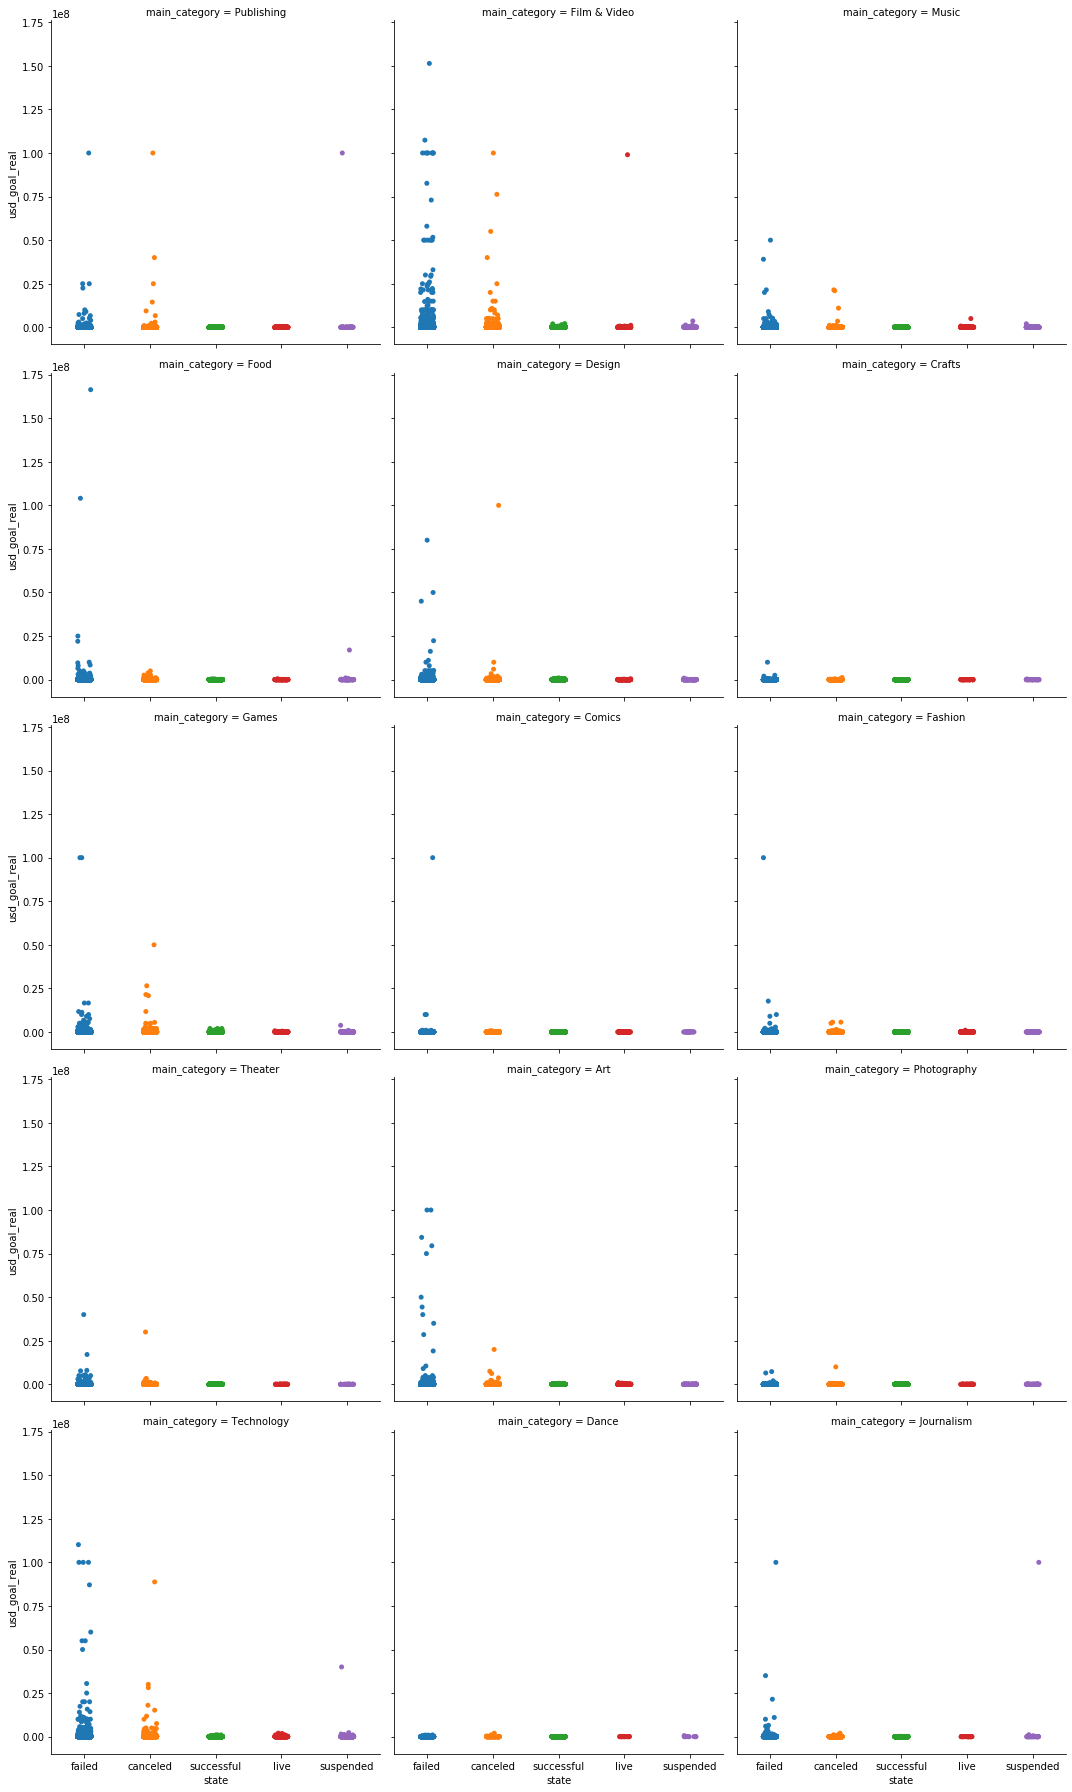

In [10]:
g = sns.catplot(data=ks, col='main_category',  x='state', 
                y='usd_goal_real', col_wrap=3)

plt.show()

## Rollout Improvement Plan
### The Problem
As shown above, the higher the pledge goal needed to fund a kickstart project the more likely that the project will fail. In DATE, Kickstarter performed a series of analytics to access the project fail rate and how to better improve it. Their analysis noted that the success rate in 60 days was actually higher than in projects with pledge range of 90 days. What their analysis failed to understand is that the higher cost projects need more time to get adequete marketing traction to get pledges. 

### The Potential Solution
As noted in the analysis above the majority of successful projects were under X amount. Kickstarter needs to improve the success rate of the higher costs projects. A potential solution is to increase the max time limit to reach goal contribution amount based on the project cost. The larger the project the longer the range. 

### The Method of Testing the Solution
Kickstarter will increase the pledge max time limit for the upper ranges to 90 days instead of the current 60 days. The variable of interest is successrate of shorter and longer time periods. This is an A/B testing where the control group is the current timeframe of the projects and the test group is the new timeframe. The 90 day period will be tested for six months. During this period, the success rate of these projects will be monitored. If the  success rate increases to be in line with the current success rate of the lower pledge projects, conclude that the new time range is effective.


# Data
https://www.kaggle.com/kemical/kickstarter-projects

## References
https://www.kickstarter.com/charter?ref=global-footer
https://www.kickstarter.com/help/stats?ref=global-footer